In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import unittest
from unittest.mock import Mock
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
results = []

In [ ]:
def evaluate_classifier(classifier, X_train, X_test, y_train, y_test, classifier_name):
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        print(f"Classification Report for {classifier_name}:")
        print(classification_report(y_test, y_pred, zero_division=1))
        print(f'Accuracy: {round(score*100,2)}%')
        results.append([classifier_name, score])

In [ ]:
def clean_df(df,fields, fields_to_drop):
    df = df.dropna()
    for field in fields_to_drop:
        df = df.drop([field], axis=1)

    for field in fields:
        df = df[df[field] != ' ']
    return df

In [ ]:
def main():
    df = pd.read_csv('FakeNewsNet.csv')

    # Concatenate 'title' and 'domain' fields
    df['title_domain'] = df['title'] + ' ' + df['source_domain']

    # clean data
    df = clean_df(df, ['title_domain'],['tweet_num'])

    # split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df['title_domain'], df['real'], test_size=0.2, random_state=7)
    # initialize a TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
    # transform the training and testing data
    tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    tfidf_test = tfidf_vectorizer.transform(X_test)

    # initialize a PassiveAggressiveClassifier
    print("First we use different classification algorithms to detect fake news")
    # Initialize classifiers
    pac = PassiveAggressiveClassifier()
    nb_classifier = MultinomialNB()
    rf_classifier = RandomForestClassifier()
    svc_classifier = SVC()
    dt_classifier = DecisionTreeClassifier()
    knn_classifier = KNeighborsClassifier()
    lr_classifier = LogisticRegression()

    # Evaluate classifiers
    evaluate_classifier(pac, tfidf_train, tfidf_test, y_train, y_test, "Passive Aggressive Classifier")
    evaluate_classifier(nb_classifier, tfidf_train, tfidf_test, y_train, y_test, "MultinomialNB Classifier")
    evaluate_classifier(rf_classifier, tfidf_train, tfidf_test, y_train, y_test, "RandomForest Classifier")
    evaluate_classifier(svc_classifier, tfidf_train, tfidf_test, y_train, y_test, "SVC Classifier")
    evaluate_classifier(dt_classifier, tfidf_train, tfidf_test, y_train, y_test, "DecisionTree Classifier")
    evaluate_classifier(knn_classifier, tfidf_train, tfidf_test, y_train, y_test, "KNeighbors Classifier")
    evaluate_classifier(lr_classifier, tfidf_train, tfidf_test, y_train, y_test, "LogisticRegression Classifier")

    from sklearn.ensemble import VotingClassifier
    print("Now using ensemble learning to combine the results of all models")

    voting_classifier = VotingClassifier(estimators=[('pac', pac), ('nb', nb_classifier), ('rf', rf_classifier), ('svc', svc_classifier), ('dt', dt_classifier), ('knn', knn_classifier), ('lr', lr_classifier)], voting='hard')

    evaluate_classifier(voting_classifier, tfidf_train, tfidf_test, y_train, y_test, "Voting Classifier")

    from sklearn.model_selection import GridSearchCV
    print("Now using hyperparameter tuning to improve the performance of the best model we found SVC classifier")
    param_grid = {'C': [1, 10, 100]}
    # initialize the grid search
    grid = GridSearchCV(svc_classifier, param_grid, refit = True, verbose = 3)
    # fit the grid search
    grid.fit(tfidf_train, y_train)
    # print the best parameters
    print("Best parameters for SVC Classifier:")
    print(grid.best_params_)
    # initialize a SVC
    svc_classifier = SVC(C=100)
    svc_classifier.fit(tfidf_train, y_train)
    # predict on the test set and calculate accuracy
    y_pred = svc_classifier.predict(tfidf_test)
    score = accuracy_score(y_test, y_pred)
    # print the accuracy
    print("Classification Report for SVC Classifier with best parameters:")
    print(classification_report(y_test, y_pred))
    print(f'Accuracy: {round(score*100,2)}%')


    # initialize a CountVectorizer

    from sklearn.feature_extraction.text import CountVectorizer
    print("Now using different feature extraction methods to improve the performance of the models")
    count_vectorizer = CountVectorizer(stop_words='english', max_df=0.7)
    # transform the training and testing data
    count_train = count_vectorizer.fit_transform(X_train)
    count_test = count_vectorizer.transform(X_test)
    # initialize a TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
    # transform the training and testing data
    tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    tfidf_test = tfidf_vectorizer.transform(X_test)
    # initialize the voting classifier
    voting_classifier = VotingClassifier(estimators=[('pac', pac), ('nb', nb_classifier), ('rf', rf_classifier), ('svc', svc_classifier), ('dt', dt_classifier), ('knn', knn_classifier), ('lr', lr_classifier)], voting='hard')
    # fit the voting classifier
    voting_classifier.fit(count_train, y_train)
    # predict on the test set
    y_pred = voting_classifier.predict(count_test)
    # calculate accuracy
    score = accuracy_score(y_test, y_pred)
    # print the accuracy
    print("Classification Report for Voting Classifier with CountVectorizer:")
    print(classification_report(y_test, y_pred))
    print(f'Accuracy: {round(score*100,2)}%')

    # initialize a CountVectorizer
    print("Now using different feature extraction methods to improve the performance of the models")
    count_vectorizer = CountVectorizer(stop_words='english', max_df=0.7, token_pattern=r'\b\w+\b')
    # transform the training and testing data
    count_train = count_vectorizer.fit_transform(X_train)
    count_test = count_vectorizer.transform(X_test)
    # initialize a TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, token_pattern=r'\b\w+\b')
    # transform the training and testing data
    tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    tfidf_test = tfidf_vectorizer.transform(X_test)
    # initialize the voting classifier
    voting_classifier = VotingClassifier(estimators=[('pac', pac), ('nb', nb_classifier), ('rf', rf_classifier), ('svc', svc_classifier), ('dt', dt_classifier), ('knn', knn_classifier), ('lr', lr_classifier)], voting='hard')
    # fit the voting classifier
    voting_classifier.fit(count_train, y_train)
    # predict on the test set
    y_pred = voting_classifier.predict(count_test)
    # calculate accuracy
    score = accuracy_score(y_test, y_pred)
    # print the accuracy
    print("Classification Report for Voting Classifier with CountVectorizer and token pattern:")
    print(classification_report(y_test, y_pred))
    print(f'Accuracy: {round(score*100,2)}%')


    df = pd.DataFrame(results, columns=['Classifier', 'Accuracy'])

    # Create a bar plot of the accuracy scores
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Accuracy', y='Classifier', data=df, palette='Blues_d')
    plt.title('Classifier Accuracy')
    plt.show()

    # Create a line plot of the accuracy scores
    plt.ylim(0.8, 1)
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='Classifier', y='Accuracy', data=df, marker='o')
    plt.title('Classifier Accuracy')
    plt.show()

First we use different classification algorithms to detect fake news
Classification Report for Passive Aggressive Classifier:
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      1106
           1       0.88      0.88      0.88      3468

    accuracy                           0.82      4574
   macro avg       0.75      0.76      0.75      4574
weighted avg       0.82      0.82      0.82      4574

Accuracy: 81.81%
Classification Report for MultinomialNB Classifier:
              precision    recall  f1-score   support

           0       0.93      0.37      0.53      1106
           1       0.83      0.99      0.90      3468

    accuracy                           0.84      4574
   macro avg       0.88      0.68      0.72      4574
weighted avg       0.86      0.84      0.81      4574

Accuracy: 84.06%
Classification Report for RandomForest Classifier:
              precision    recall  f1-score   support

           0       0.82     

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Voting Classifier with CountVectorizer:
              precision    recall  f1-score   support

           0       0.82      0.61      0.70      1106
           1       0.89      0.96      0.92      3468

    accuracy                           0.87      4574
   macro avg       0.85      0.78      0.81      4574
weighted avg       0.87      0.87      0.87      4574

Accuracy: 87.3%
Now using different feature extraction methods to improve the performance of the models


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Voting Classifier with CountVectorizer and token pattern:
              precision    recall  f1-score   support

           0       0.81      0.60      0.69      1106
           1       0.88      0.95      0.92      3468

    accuracy                           0.87      4574
   macro avg       0.84      0.78      0.80      4574
weighted avg       0.86      0.87      0.86      4574

Accuracy: 86.88%


<ipython-input-5-7e2548813741>:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Classifier', data=df, palette='Blues_d')


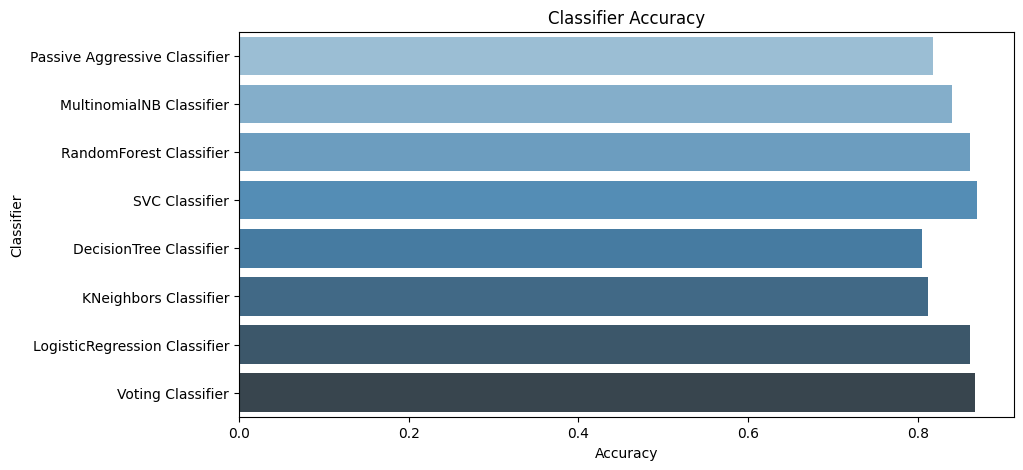

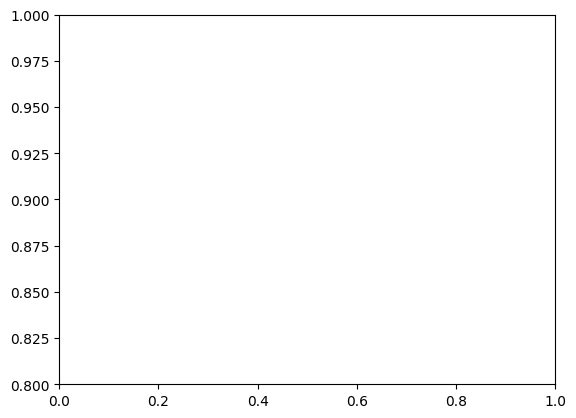

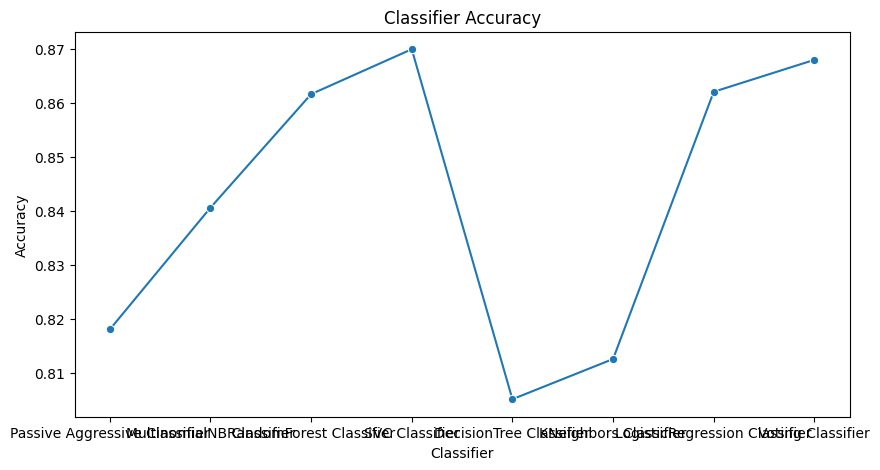

In [ ]:
main()

In [ ]:
# unit tests:

class TestEvaluateClassifier(unittest.TestCase):
    def setUp(self):
        # Create a mock classifier
        self.classifier = Mock()
        self.classifier.fit = Mock()
        self.classifier.predict = Mock(return_value=[0, 1, 1, 0])
        # Create mock data
        self.X_train = Mock()
        self.X_test = Mock()
        self.y_train = [0, 1, 1, 0]
        self.y_test = [0, 1, 1, 0]
        self.classifier_name = "Mock Classifier"

    def test_evaluate_classifier(self):
        # Call the function with the mock data
        evaluate_classifier(self.classifier, self.X_train, self.X_test, self.y_train, self.y_test, self.classifier_name)
        # Check if the fit method was called with the correct parameters
        self.classifier.fit.assert_called_with(self.X_train, self.y_train)
        # Check if the predict method was called with the correct parameters
        self.classifier.predict.assert_called_with(self.X_test)
        # Check if the accuracy score is correct
        score = accuracy_score(self.y_test, self.classifier.predict(self.X_test))
        self.assertEqual(score, 1.0)

    def test_evaluate_classifier_with_unexpected_predict_result(self):
        self.classifier.predict.return_value = None
        with self.assertRaises(Exception):
            evaluate_classifier(self.classifier, self.X_train, self.X_test, self.y_train, self.y_test, self.classifier_name)


class TestCleanDF(unittest.TestCase):
    def test_clean_df(self):
        # Create a mock DataFrame
        df = pd.DataFrame({
            'title': ['title1', 'title2', 'title3', np.nan],
            'tweet_num': [1, 2, 3, 4],
            'real': ['yes', 'no', 'yes', 'no']
        })

        # Call the clean_df function
        cleaned_df = clean_df(df, ['title'], ['tweet_num'])

        # Create the expected DataFrame
        expected_df = pd.DataFrame({
            'title': ['title1', 'title2', 'title3'],
            'real': ['yes', 'no', 'yes']
        })

        # Check if the output DataFrame is as expected
        pd.testing.assert_frame_equal(cleaned_df.reset_index(drop=True), expected_df.reset_index(drop=True))

In [ ]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_clean_df (__main__.TestCleanDF) ... ok
test_evaluate_classifier (__main__.TestEvaluateClassifier) ... ok
test_evaluate_classifier_with_unexpected_predict_result (__main__.TestEvaluateClassifier) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.047s

OK


Classification Report for Mock Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Accuracy: 100.0%
